In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from  tensorflow.keras.preprocessing.sequence import pad_sequences


from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

import re

In [10]:
data = pd.read_csv('mary_oliver.csv')
poems_mo = data.iloc[:,1]
display(poems_mo)
poems=poems_mo

0      \nThere is a thing in me that dreamed of trees...
1      \nShe sends me news of blue jays, frost,\nOf s...
2      \nShe steps into the dark swamp\nwhere the lon...
3      \nMy father, for example,\nwho was young once\...
4      \nClosing the book, I find I have left my head...
                             ...                        
96     \nDon't call this world adorable, or useful, t...
97     \nAll night\nI float\nin the shallow ponds\nwh...
98     \nBone\n1.\nUnderstand, I am always trying to ...
99     \nYou do not have to be good.\nYou do not have...
100    \nHow necessary it is to have opinions! I thin...
Name: text, Length: 101, dtype: object

In [2]:
## Add data from Pavlo Neruda
data_pn = pd.read_csv('pablo_neruda.csv')
poems_pn = data_pn.iloc[:,1]
pd.set_option('display.max_rows', 131)
display(poems_pn)


0      \nMy dog has died.\nI buried him in the garden...
1      \n\nOut of lemon flowers\nloosed\non the moonl...
2      \nThe memory of you emerges from the night aro...
3      \n\nI have scarcely left you\nWhen you go in m...
4      \n\nEra el crepúsculo de la iguana.\nDesde la ...
5      \nI am not jealous\nof what came before me.\nC...
6      \nAnd because love battles\nnot only in its bu...
7      \n\nIt was passed from one bird to another,\nt...
8      \n\nBrown and agile child, the sun which forms...
9      \nCarnal apple, Woman filled, burning moon,\nd...
10     \n\nCastro Alves from Brazil, for whom did you...
11     \nHow neatly a cat sleeps,\nSleeps with its pa...
12     \nWe have lost even this twilight.\nNo one saw...
13     \nCome with me, I said, and no one knew\nwhere...
14     \nThere are lone cemeteries,\ntombs full of so...
15     \nDon't go far off, not even for a day, becaus...
16     \nDrunk as drunk on turpentine\nFrom your open...
17     \n\nVictory. It has come

In [3]:
spanish_poems=[4,37,38,74,79,83]

for i in spanish_poems:
    print (poems_pn[i])
    poems_pn.pop(i)




Era el crepúsculo de la iguana.
Desde la arcoirisada crestería
su leengua como un dardo
se hundía en la verdura,
el hormiguero monacal pisaba
con melodioso pie la selva,
el guanaco fino como el oxigeno
en las anchas alturas pardas
iba calzando botas de oro,
mientras la llama abria cándidos
ojos en la delicadeza
del mundo lleno de rocio.
Los monos trenzaban un hilo
interminablemente erótico
en las riberas de la aurora,
derribando muros de polen
y espantando el vuelo violeta
de las mariposas de Muzo
Era la noche de los caimanes,
la noche pura y pululante
de hocicos saliendo del légamo,
y de las ciénagas soñolientas
un ruido opaco de armaduras
volvía al origen terrestre.
El jaguar tocaba las hojas
con su ausencia fosforescente,
el puma corre en el ramaje
como el fuego devorador
mientras arden en él los ojos
alcohólicos de la selva.
Los tejones rascan los pies
del río, husmean el nido
cuya delicia palpitante
atacarán con dientes rojos.
Y en el fondo del agua magna,
como el círulo de la t

In [4]:
poems=poems_pn

In [8]:
# Add other poems about nature:
data_n = pd.read_csv('nature.csv')
poems_n = data_n.iloc[:,1]
display(poems_n)

0      \nToday i pass through the rugged land\nlooks ...
1      \nRoses ruddy and roses white,\nWhat are the j...
2      \nA child said, What is the grass? fetching it...
3      \nIt winds along the face of a cliff\nThis pat...
4      \nI've found a friend in nature\nalthough natu...
                             ...                        
210    \nHe shouts in the sails of the ships at sea,\...
211    \nEvery year in early spring\nupon the prairie...
212    \nWith the backdoor hue turning mist, The day ...
213    \nyou say you love\nthe earth\nlove the ocean\...
214    \nAt the end of every cosmic cycle,\nat the en...
Name: text, Length: 215, dtype: object

In [16]:
type(poems_mo)

pandas.core.series.Series

In [63]:
#poems_mo = pd.DataFrame(poems_mo)
#poems_pn = pd.DataFrame(poems_pn)

poems = pd.concat([poems_mo, poems_pn, poems_n], axis=0).reset_index(drop=True)

poems

0      \nThere is a thing in me that dreamed of trees...
1      \nShe sends me news of blue jays, frost,\nOf s...
2      \nShe steps into the dark swamp\nwhere the lon...
3      \nMy father, for example,\nwho was young once\...
4      \nClosing the book, I find I have left my head...
                             ...                        
442    \nHe shouts in the sails of the ships at sea,\...
443    \nEvery year in early spring\nupon the prairie...
444    \nWith the backdoor hue turning mist, The day ...
445    \nyou say you love\nthe earth\nlove the ocean\...
446    \nAt the end of every cosmic cycle,\nat the en...
Name: text, Length: 447, dtype: object

In [5]:
# lower all words:
corpus = []
for row in poems:
    #print(row)
    line = row.lower().split('\n')
    corpus.append(line)

In [5]:
corpus

[['',
  'there is a thing in me that dreamed of trees,',
  'a quiet house, some green and modest acres',
  'a little way from every troubling town,',
  'a little way from factories, schools, laments.',
  'i would have time, i thought, and time to spare,',
  'with only streams and birds for company,',
  'to build out of my life a few wild stanzas.',
  'and then it came to me, that so was death,',
  'a little way away from everywhere.',
  'there is a thing in me still dreams of trees.',
  'but let it go. homesick for moderation,',
  "half the world's artists shrink or fall away.",
  'if any find solution, let him tell it.',
  'meanwhile i bend my heart toward lamentation',
  'where, as the times implore our true involvement,',
  'the blades of every crisis point the way.',
  'i would it were not so, but so it is.',
  'who ever made music of a mild day? '],
 ['',
  'she sends me news of blue jays, frost,',
  'of stars and now the harvest moon',
  'that rides above the stricken hills.',
  

In [41]:
corpus[3][38]

'              from:\xa0'

In [6]:
for i in range(0, len(corpus)):
    for j in range(0, len(corpus[i])):
        if '\xa0' in corpus[i][j]:
            #print(corpus[i][j])
            corpus[i][j]=''
            corpus[i][j+1]=''
        elif '<' in corpus[i][j]:
            corpus[i][j]=''
        elif 'neruda' in corpus[i][j]:
            corpus[i][j]=''

    

In [7]:
corpus

[['',
  'my dog has died.',
  'i buried him in the garden',
  'next to a rusted old machine.',
  "some day i'll join him right there,",
  "but now he's gone with his shaggy coat,",
  'his bad manners and his cold nose,',
  'and i, the materialist, who never believed',
  'in any promised heaven in the sky',
  'for any human being,',
  "i believe in a heaven i'll never enter.",
  'yes, i believe in a heaven for all dogdom',
  'where my dog waits for my arrival',
  'waving his fan-like tail in friendship.',
  "ai, i'll not speak of sadness here on earth,",
  'of having lost a companion',
  'who was never servile.',
  'his friendship for me, like that of a porcupine',
  'withholding its authority,',
  'was the friendship of a star, aloof,',
  'with no more intimacy than was called for,',
  'with no exaggerations:',
  'he never climbed all over my clothes',
  'filling me full of his hair or his mange,',
  'he never rubbed up against my knee',
  'like other dogs obsessed with sex.',
  'no, m

In [ ]:
#corpus_cleaned = [item for sublist in corpus for item in sublist]
#corpus_cleaned = [item for item in corpus_cleaned if item.strip()]
#corpus_cleaned

In [8]:
# Get rid of the empty items of the lists and remove special characters: 
corpus_cleaned=[]
#
for i in range(0, len(corpus)):
    #corpus[i].pop(0)
    for j in range(0, len(corpus[i])):
        non_num = re.findall("([a-z]+)", corpus[i][j])
        non_num = ' '.join(non_num)
        corpus_cleaned.append(non_num)       
       
    
corpus_cleaned = [item for item in corpus_cleaned if item.strip()]

In [9]:
corpus_cleaned

['my dog has died',
 'i buried him in the garden',
 'next to a rusted old machine',
 'some day i ll join him right there',
 'but now he s gone with his shaggy coat',
 'his bad manners and his cold nose',
 'and i the materialist who never believed',
 'in any promised heaven in the sky',
 'for any human being',
 'i believe in a heaven i ll never enter',
 'yes i believe in a heaven for all dogdom',
 'where my dog waits for my arrival',
 'waving his fan like tail in friendship',
 'ai i ll not speak of sadness here on earth',
 'of having lost a companion',
 'who was never servile',
 'his friendship for me like that of a porcupine',
 'withholding its authority',
 'was the friendship of a star aloof',
 'with no more intimacy than was called for',
 'with no exaggerations',
 'he never climbed all over my clothes',
 'filling me full of his hair or his mange',
 'he never rubbed up against my knee',
 'like other dogs obsessed with sex',
 'no my dog used to gaze at me',
 'paying me the attention i 

In [19]:
pd.DataFrame(corpus_cleaned).to_csv('pn_corpus.csv', index=False)

In [10]:
#Tokenize all words of the poems: Give them numbers

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus_cleaned)
total_words = len(tokenizer.word_index) + 1 ## Add one to the length of the number of words to indicate, that we 
                                            ## have an out-of-vocabulary token
word_index = tokenizer.word_index

In [11]:
print(total_words)
print(word_index)

4088
{'the': 1, 'of': 2, 'and': 3, 'a': 4, 'i': 5, 'in': 6, 'you': 7, 'to': 8, 'your': 9, 'my': 10, 'with': 11, 'that': 12, 'it': 13, 'like': 14, 'me': 15, 'is': 16, 'as': 17, 'from': 18, 'on': 19, 'are': 20, 'love': 21, 'its': 22, 'not': 23, 'one': 24, 'for': 25, 'or': 26, 's': 27, 'was': 28, 'by': 29, 'all': 30, 'no': 31, 'they': 32, 'at': 33, 'earth': 34, 'so': 35, 'when': 36, 'there': 37, 'but': 38, 'light': 39, 'sea': 40, 'we': 41, 'eyes': 42, 'were': 43, 'night': 44, 'his': 45, 'this': 46, 'out': 47, 'he': 48, 'into': 49, 'will': 50, 'be': 51, 'without': 52, 'have': 53, 'if': 54, 'through': 55, 'up': 56, 'them': 57, 'who': 58, 'do': 59, 'which': 60, 'water': 61, 'death': 62, 'her': 63, 'their': 64, 't': 65, 'go': 66, 'what': 67, 'blood': 68, 'am': 69, 'come': 70, 'only': 71, 'day': 72, 'how': 73, 'made': 74, 'where': 75, 'over': 76, 'life': 77, 'feet': 78, 'because': 79, 'those': 80, 'know': 81, 'fire': 82, 'want': 83, 'then': 84, 'soul': 85, 'our': 86, 'an': 87, 'everything': 88

In [20]:
import pickle

# open a file, where you ant to store the data
file = open('pn_word_index.p', 'wb')

# dump information to that file
pickle.dump(word_index, file)

# close the file
file.close()

In [12]:
input_sequences = []

for line in corpus_cleaned:
    token_list = tokenizer.texts_to_sequences([line])[0]## Creates a sequence of numbers for every line
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]     ## This creates for each line a series of sequences with
        print(n_gram_sequence)                                       ## only some of the words: word 1 and 2 for the first
                                               ## sequence, word 1, 2 and 3 for the next and so on
        input_sequences.append(n_gram_sequence)

[10, 314]
[10, 314, 102]
[10, 314, 102, 344]
[5, 390]
[5, 390, 114]
[5, 390, 114, 6]
[5, 390, 114, 6, 1]
[5, 390, 114, 6, 1, 547]
[822, 8]
[822, 8, 4]
[822, 8, 4, 1751]
[822, 8, 4, 1751, 154]
[822, 8, 4, 1751, 154, 1130]
[315, 72]
[315, 72, 5]
[315, 72, 5, 238]
[315, 72, 5, 238, 1131]
[315, 72, 5, 238, 1131, 114]
[315, 72, 5, 238, 1131, 114, 1132]
[315, 72, 5, 238, 1131, 114, 1132, 37]
[38, 108]
[38, 108, 48]
[38, 108, 48, 27]
[38, 108, 48, 27, 391]
[38, 108, 48, 27, 391, 11]
[38, 108, 48, 27, 391, 11, 45]
[38, 108, 48, 27, 391, 11, 45, 1133]
[38, 108, 48, 27, 391, 11, 45, 1133, 1752]
[45, 643]
[45, 643, 1753]
[45, 643, 1753, 3]
[45, 643, 1753, 3, 45]
[45, 643, 1753, 3, 45, 168]
[45, 643, 1753, 3, 45, 168, 644]
[3, 5]
[3, 5, 1]
[3, 5, 1, 1754]
[3, 5, 1, 1754, 58]
[3, 5, 1, 1754, 58, 115]
[3, 5, 1, 1754, 58, 115, 823]
[6, 824]
[6, 824, 1755]
[6, 824, 1755, 465]
[6, 824, 1755, 465, 6]
[6, 824, 1755, 465, 6, 1]
[6, 824, 1755, 465, 6, 1, 121]
[25, 824]
[25, 824, 548]
[25, 824, 548, 140]
[5

[18, 86]
[18, 86, 1863]
[18, 86, 1863, 356]
[8, 574]
[8, 574, 1]
[8, 574, 1, 82]
[8, 574, 1, 82, 3]
[8, 574, 1, 82, 3, 1]
[8, 574, 1, 82, 3, 1, 474]
[2, 4]
[2, 4, 410]
[2, 4, 410, 21]
[13, 28]
[13, 28, 881]
[13, 28, 881, 18]
[13, 28, 881, 18, 24]
[13, 28, 881, 18, 24, 300]
[13, 28, 881, 18, 24, 300, 8]
[13, 28, 881, 18, 24, 300, 8, 269]
[1, 411]
[1, 411, 667]
[1, 411, 667, 2]
[1, 411, 667, 2, 1]
[1, 411, 667, 2, 1, 72]
[1, 72]
[1, 72, 210]
[1, 72, 210, 18]
[1, 72, 210, 18, 1203]
[1, 72, 210, 18, 1203, 8]
[1, 72, 210, 18, 1203, 8, 1203]
[210, 270]
[210, 270, 6]
[210, 270, 6, 1864]
[6, 1176]
[6, 1176, 60]
[6, 1176, 60, 357]
[6, 1176, 60, 357, 4]
[6, 1176, 60, 357, 4, 412]
[55, 1]
[55, 1, 126]
[55, 1, 126, 195]
[55, 1, 126, 195, 678]
[8, 75]
[8, 75, 134]
[8, 75, 134, 43]
[8, 75, 134, 43, 413]
[8, 75, 134, 43, 413, 149]
[1, 1204]
[1, 1204, 152]
[1, 1204, 152, 226]
[3, 37]
[3, 37, 44]
[3, 37, 44, 296]
[3, 37, 44, 296, 6]
[36, 5]
[36, 5, 487]
[36, 5, 487, 18]
[36, 5, 487, 18, 35]
[36, 5, 487

[1977, 1978, 25]
[1977, 1978, 25, 78]
[37, 16]
[37, 16, 62]
[37, 16, 62, 6]
[37, 16, 62, 6, 1]
[37, 16, 62, 6, 1, 306]
[14, 4]
[14, 4, 137]
[14, 4, 137, 128]
[4, 1979]
[4, 1979, 52]
[4, 1979, 52, 22]
[4, 1979, 52, 22, 314]
[47, 2]
[47, 2, 166]
[47, 2, 166, 581]
[47, 2, 166, 581, 166]
[47, 2, 166, 581, 166, 561]
[1980, 6]
[1980, 6, 46]
[1980, 6, 46, 1981]
[1980, 6, 46, 1981, 14]
[1980, 6, 46, 1981, 14, 847]
[1980, 6, 46, 1981, 14, 847, 26]
[1980, 6, 46, 1981, 14, 847, 26, 328]
[5, 104]
[5, 104, 36]
[5, 104, 36, 156]
[5, 104, 36, 156, 33]
[5, 104, 36, 156, 33, 241]
[712, 161]
[712, 161, 713]
[1982, 47]
[1982, 47, 11]
[1982, 47, 11, 1]
[1982, 47, 11, 1, 294]
[1982, 47, 11, 1, 294, 100]
[1982, 47, 11, 1, 294, 100, 297]
[1982, 47, 11, 1, 294, 100, 297, 6]
[1982, 47, 11, 1, 294, 100, 297, 6, 64]
[1982, 47, 11, 1, 294, 100, 297, 6, 64, 100]
[1982, 47, 11, 1, 294, 100, 297, 6, 64, 100, 1251]
[909, 17]
[909, 17, 200]
[909, 17, 200, 17]
[909, 17, 200, 17, 910]
[1983, 500]
[1983, 500, 714]
[1983,

[3, 145]
[3, 145, 90]
[3, 145, 90, 210]
[3, 145, 90, 210, 47]
[3, 145, 90, 210, 47, 29]
[3, 145, 90, 210, 47, 29, 12]
[3, 145, 90, 210, 47, 29, 12, 232]
[1303, 1]
[1303, 1, 124]
[1303, 1, 124, 90]
[1303, 1, 124, 90, 28]
[1303, 1, 124, 90, 28, 2101]
[681, 14]
[681, 14, 4]
[681, 14, 4, 200]
[681, 14, 4, 200, 127]
[681, 14, 4, 200, 127, 6]
[681, 14, 4, 200, 127, 6, 1]
[681, 14, 4, 200, 127, 6, 1, 328]
[3, 52]
[3, 52, 201]
[3, 52, 201, 172]
[3, 52, 201, 172, 90]
[3, 52, 201, 172, 90, 938]
[3, 52, 201, 172, 90, 938, 274]
[938, 374]
[938, 374, 737]
[938, 374, 737, 938]
[938, 374, 737, 938, 374]
[938, 374, 737, 938, 374, 62]
[2102, 514]
[2102, 514, 26]
[2102, 514, 26, 415]
[375, 2103]
[130, 26]
[130, 26, 37]
[1142, 106]
[2104, 10]
[2104, 10, 2105]
[1304, 410]
[1304, 410, 68]
[432, 5]
[432, 5, 2106]
[26, 69]
[26, 69, 131]
[26, 69, 131, 375]
[2107, 423]
[2107, 423, 1305]
[2107, 423, 1305, 592]
[200, 2108]
[200, 2108, 2]
[200, 2108, 2, 1]
[200, 2108, 2, 1, 501]
[200, 2108, 2, 1, 501, 2109]
[1, 2

[111, 119, 1, 40, 968, 3, 1369]
[46, 16]
[46, 16, 4]
[46, 16, 4, 969]
[130, 5]
[130, 5, 21]
[130, 5, 21, 7]
[130, 5]
[130, 5, 21]
[130, 5, 21, 7]
[130, 5, 21, 7, 3]
[130, 5, 21, 7, 3, 1]
[130, 5, 21, 7, 3, 1, 2256]
[130, 5, 21, 7, 3, 1, 2256, 2257]
[130, 5, 21, 7, 3, 1, 2256, 2257, 7]
[130, 5, 21, 7, 3, 1, 2256, 2257, 7, 6]
[130, 5, 21, 7, 3, 1, 2256, 2257, 7, 6, 1139]
[5, 21]
[5, 21, 7]
[5, 21, 7, 92]
[5, 21, 7, 92, 116]
[5, 21, 7, 92, 116, 151]
[5, 21, 7, 92, 116, 151, 168]
[5, 21, 7, 92, 116, 151, 168, 146]
[253, 10]
[253, 10, 208]
[253, 10, 208, 66]
[253, 10, 208, 66, 19]
[253, 10, 208, 66, 19, 80]
[253, 10, 208, 66, 19, 80, 520]
[253, 10, 208, 66, 19, 80, 520, 2258]
[12, 404]
[12, 404, 1]
[12, 404, 1, 40]
[12, 404, 1, 40, 374]
[12, 404, 1, 40, 374, 31]
[12, 404, 1, 40, 374, 31, 1134]
[5, 104]
[5, 104, 213]
[5, 104, 213, 749]
[5, 104, 213, 749, 14]
[5, 104, 213, 749, 14, 80]
[5, 104, 213, 749, 14, 80, 154]
[5, 104, 213, 749, 14, 80, 154, 2259]
[1, 2260]
[1, 2260, 2261]
[1, 2260, 22

[7, 20, 14, 44, 525, 1403]
[9, 101]
[9, 101, 16]
[9, 101, 16, 239]
[9, 101, 16, 239, 14]
[9, 101, 16, 239, 14, 17]
[9, 101, 16, 239, 14, 17, 229]
[9, 101, 16, 239, 14, 17, 229, 17]
[9, 101, 16, 239, 14, 17, 229, 17, 410]
[5, 14]
[5, 14, 7]
[5, 14, 7, 444]
[5, 14, 7, 444, 17]
[5, 14, 7, 444, 17, 54]
[5, 14, 7, 444, 17, 54, 7]
[5, 14, 7, 444, 17, 54, 7, 43]
[5, 14, 7, 444, 17, 54, 7, 43, 445]
[229, 3]
[229, 3, 982]
[229, 3, 982, 17]
[229, 3, 982, 17, 54]
[229, 3, 982, 17, 54, 7]
[229, 3, 982, 17, 54, 7, 43]
[229, 3, 982, 17, 54, 7, 43, 100]
[24, 406]
[24, 406, 33]
[24, 406, 33, 12]
[24, 406, 33, 12, 584]
[24, 406, 33, 12, 584, 4]
[24, 406, 33, 12, 584, 4, 488]
[24, 406, 33, 12, 584, 4, 488, 16]
[24, 406, 33, 12, 584, 4, 488, 16, 1404]
[3, 5]
[3, 5, 758]
[3, 5, 758, 84]
[3, 5, 758, 84, 5]
[3, 5, 758, 84, 5, 758]
[3, 5, 758, 84, 5, 758, 12]
[3, 5, 758, 84, 5, 758, 12, 13]
[3, 5, 758, 84, 5, 758, 12, 13, 281]
[3, 5, 758, 84, 5, 758, 12, 13, 281, 51]
[3, 5, 758, 84, 5, 758, 12, 13, 281, 51, 

[354, 87, 590, 649, 2, 1208, 3, 1197]
[4, 771]
[4, 771, 2]
[4, 771, 2, 1348]
[4, 771, 2, 1348, 1349]
[4, 771, 2, 1348, 1349, 140]
[4, 771, 2, 1348, 1349, 140, 2416]
[3, 2417]
[3, 2417, 223]
[3, 2417, 223, 12]
[3, 2417, 223, 12, 1439]
[3, 2417, 223, 12, 1439, 14]
[3, 2417, 223, 12, 1439, 14, 42]
[1, 244]
[1, 244, 2418]
[1, 244, 2418, 252]
[1, 244, 2418, 252, 13]
[1, 244, 2418, 252, 13, 30]
[252, 1]
[252, 1, 1440]
[252, 1, 1440, 2419]
[252, 1, 1440, 2419, 3]
[252, 1, 1440, 2419, 3, 1351]
[252, 1, 1440, 2419, 3, 1351, 676]
[252, 1, 1440, 2419, 3, 1351, 676, 29]
[252, 1, 1440, 2419, 3, 1351, 676, 29, 44]
[252, 1, 1440, 2419, 3, 1351, 676, 29, 44, 6]
[252, 1, 1440, 2419, 3, 1351, 676, 29, 44, 6, 599]
[102, 2420]
[102, 2420, 2421]
[102, 2420, 2421, 1]
[102, 2420, 2421, 1, 614]
[102, 2420, 2421, 1, 614, 822]
[102, 2420, 2421, 1, 614, 822, 232]
[3, 1001]
[3, 1001, 63]
[3, 1001, 63, 119]
[3, 1001, 63, 119, 8]
[3, 1001, 63, 119, 8, 4]
[3, 1001, 63, 119, 8, 4, 724]
[3, 1001, 63, 119, 8, 4, 724, 9

[2, 2494, 61, 6, 1, 451, 2, 465]
[12, 1471]
[12, 1471, 3]
[12, 1471, 3, 1472]
[12, 1471, 3, 1472, 22]
[12, 1471, 3, 1472, 22, 2495]
[12, 1471, 3, 1472, 22, 2495, 1473]
[197, 41]
[197, 41, 20]
[197, 41, 20, 71]
[197, 41, 20, 71, 1]
[197, 41, 20, 71, 1, 24]
[197, 41, 20, 71, 1, 24, 96]
[197, 41, 20, 71, 1, 24, 96, 622]
[4, 290]
[4, 290, 49]
[4, 290, 49, 60]
[4, 290, 49, 60, 175]
[4, 290, 49, 60, 175, 941]
[4, 290, 49, 60, 175, 941, 517]
[24, 528]
[24, 528, 6]
[24, 528, 6, 1]
[24, 528, 6, 1, 1020]
[24, 528, 6, 1, 1020, 2]
[24, 528, 6, 1, 1020, 2, 4]
[24, 528, 6, 1, 1020, 2, 4, 1021]
[24, 528, 6, 1, 1020, 2, 4, 1021, 442]
[24, 528, 6, 1, 1020, 2, 4, 1021, 442, 124]
[569, 2496]
[569, 2496, 194]
[569, 2496, 194, 301]
[569, 2496, 194, 301, 194]
[569, 2496, 194, 301, 194, 136]
[194, 200]
[194, 200, 38]
[194, 200, 38, 2497]
[3, 4]
[3, 4, 1474]
[3, 4, 1474, 2498]
[270, 6]
[270, 6, 44]
[270, 6, 44, 3]
[270, 6, 44, 3, 381]
[1, 512]
[1, 512, 1199]
[1, 512, 1199, 33]
[1, 512, 1199, 33, 1]
[1, 512, 1

[1, 368, 16, 1, 251, 2, 62, 201, 25, 499]
[13, 16]
[13, 16, 1]
[13, 16, 1, 916]
[13, 16, 1, 916, 2]
[13, 16, 1, 916, 2, 62]
[13, 16, 1, 916, 2, 62, 201]
[13, 16, 1, 916, 2, 62, 201, 25]
[13, 16, 1, 916, 2, 62, 201, 25, 257]
[62, 16]
[62, 16, 186]
[62, 16, 186, 1]
[62, 16, 186, 1, 1502]
[62, 16, 186, 1, 1502, 1503]
[13, 1504]
[13, 1504, 22]
[13, 1504, 22, 77]
[13, 1504, 22, 77, 375]
[13, 1504, 22, 77, 375, 19]
[13, 1504, 22, 77, 375, 19, 1]
[13, 1504, 22, 77, 375, 19, 1, 442]
[13, 1504, 22, 77, 375, 19, 1, 442, 917]
[6, 1]
[6, 1, 136]
[6, 1, 136, 918]
[6, 1, 136, 918, 3]
[6, 1, 136, 918, 3, 145]
[6, 1, 136, 918, 3, 145, 992]
[6, 1, 136, 918, 3, 145, 992, 47]
[13, 721]
[13, 721, 47]
[13, 721, 47, 4]
[13, 721, 47, 4, 1036]
[13, 721, 47, 4, 1036, 128]
[13, 721, 47, 4, 1036, 128, 12]
[13, 721, 47, 4, 1036, 128, 12, 1505]
[13, 721, 47, 4, 1036, 128, 12, 1505, 1]
[13, 721, 47, 4, 1036, 128, 12, 1505, 1, 503]
[3, 1]
[3, 1, 423]
[3, 1, 423, 66]
[3, 1, 423, 66, 504]
[3, 1, 423, 66, 504, 367]
[3,

[3, 29, 4]
[3, 29, 4, 570]
[3, 29, 4, 570, 2711]
[32, 81]
[75, 37]
[75, 37, 20]
[75, 37, 20, 1558]
[2, 227]
[146, 748]
[146, 748, 336]
[33, 329]
[14, 32]
[14, 32, 43]
[14, 32, 43, 2712]
[29, 87]
[29, 87, 450]
[29, 87, 450, 1475]
[29, 87, 450, 1475, 2713]
[13, 27]
[13, 27, 23]
[13, 27, 23, 10]
[13, 27, 23, 10, 95]
[26, 625]
[13, 632]
[13, 632, 65]
[13, 632, 65, 1]
[13, 632, 65, 1, 500]
[11, 64]
[11, 64, 319]
[11, 64, 319, 967]
[26, 1]
[26, 1, 732]
[26, 1, 732, 2]
[26, 1, 732, 2, 1]
[26, 1, 732, 2, 1, 399]
[13, 632]
[13, 632, 65]
[13, 632, 65, 573]
[13, 632, 65, 573, 26]
[13, 632, 65, 573, 26, 2714]
[13, 632]
[13, 632, 65]
[13, 632, 65, 1]
[13, 632, 65, 1, 126]
[13, 632]
[13, 632, 65]
[13, 632, 65, 1]
[13, 632, 65, 1, 1294]
[13, 632, 65, 1, 1294, 416]
[13, 632, 65, 1, 1294, 416, 2715]
[26, 44]
[26, 44, 76]
[26, 44, 76, 1]
[26, 44, 76, 1, 34]
[13, 632]
[13, 632, 65]
[13, 632, 65, 199]
[13, 632, 65, 199, 1]
[13, 632, 65, 199, 1, 644]
[13, 632, 65, 199, 1, 644, 26]
[13, 632, 65, 199, 1, 644

[5, 50, 2893, 1, 509]
[12, 175]
[12, 175, 18]
[12, 175, 18, 9]
[12, 175, 18, 9, 2894]
[5, 50]
[5, 50, 2895]
[5, 50, 2895, 1]
[5, 50, 2895, 1, 2896]
[5, 50, 2895, 1, 2896, 3]
[5, 50, 2895, 1, 2896, 3, 636]
[2, 9]
[2, 9, 2897]
[2, 9, 2897, 8]
[1, 2898]
[1, 2898, 1081]
[1, 2898, 1081, 2]
[1, 2898, 1081, 2, 1]
[1, 2898, 1081, 2, 1, 126]
[5, 50]
[5, 50, 2899]
[5, 50, 2899, 9]
[5, 50, 2899, 9, 2900]
[5, 50]
[5, 50, 2901]
[5, 50, 2901, 9]
[5, 50, 2901, 9, 330]
[5, 50, 2901, 9, 330, 1606]
[5, 50]
[5, 50, 2902]
[5, 50, 2902, 9]
[5, 50, 2902, 9, 1590]
[284, 3]
[284, 3, 746]
[284, 3, 746, 9]
[284, 3, 746, 9, 2903]
[284, 3, 746, 9, 2903, 306]
[533, 1]
[533, 1, 2904]
[533, 1, 2904, 2]
[533, 1, 2904, 2, 87]
[533, 1, 2904, 2, 87, 689]
[533, 1, 2904, 2, 87, 689, 148]
[46, 129]
[6, 1]
[6, 1, 1082]
[5, 327]
[5, 327, 211]
[5, 327, 211, 6]
[5, 327, 211, 6, 1]
[5, 327, 211, 6, 1, 129]
[5, 327, 211, 6, 1, 129, 1083]
[5, 81]
[7, 433]
[7, 433, 65]
[466, 15]
[13, 804]
[129, 804]
[129, 804, 1]
[129, 804, 1, 275

[39, 12]
[39, 12, 3115]
[39, 12, 3115, 10]
[39, 12, 3115, 10, 1217]
[1, 1027]
[1, 1027, 1638]
[1, 1027, 1638, 2]
[1, 1027, 1638, 2, 77]
[38, 7]
[38, 7, 20]
[38, 7, 20, 117]
[38, 7, 20, 117, 122]
[38, 7, 20, 117, 122, 21]
[1, 1096]
[1, 1096, 190]
[1, 1213]
[1, 1213, 2]
[1, 1213, 2, 82]
[117, 122]
[117, 122, 1]
[117, 122, 1, 138]
[117, 122, 1, 138, 2]
[117, 122, 1, 138, 2, 77]
[7, 20]
[1, 3116]
[1, 3116, 2]
[1, 3116, 2, 89]
[3118, 2]
[3118, 2, 3119]
[1095, 2]
[1095, 2, 170]
[5, 14]
[5, 14, 19]
[5, 14, 19, 1]
[5, 14, 19, 1, 541]
[36, 41]
[36, 41, 1456]
[36, 41, 1456, 895]
[1, 39]
[1, 39, 2]
[1, 39, 2, 4]
[1, 39, 2, 4, 1053]
[2, 3120]
[2, 3120, 138]
[3121, 13]
[3, 523]
[3, 523, 6]
[3, 523, 6, 182]
[528, 2]
[528, 2, 157]
[6, 182]
[6, 182, 431]
[6, 182, 431, 290]
[6, 182]
[6, 182, 623]
[6, 182, 623, 3122]
[12, 339]
[12, 339, 3123]
[8, 362]
[8, 362, 1]
[8, 362, 1, 477]
[8, 362, 1, 477, 11]
[8, 362, 1, 477, 11, 138]
[3, 6]
[3, 6, 1]
[3, 6, 1, 3124]
[3, 6, 1, 3124, 2]
[3, 6, 1, 3124, 2, 45]
[3,

[6, 1, 184]
[6, 1, 184, 2]
[6, 1, 184, 2, 1]
[6, 1, 184, 2, 1, 3250]
[1426, 172]
[1426, 172, 8]
[1426, 172, 8, 1]
[1426, 172, 8, 1, 1617]
[1426, 172, 8, 1, 1617, 2]
[1426, 172, 8, 1, 1617, 2, 1]
[1426, 172, 8, 1, 1617, 2, 1, 1297]
[1, 3251]
[1, 3251, 1616]
[1, 3251, 1616, 1]
[1, 3251, 1616, 1, 123]
[11, 45]
[11, 45, 1366]
[11, 45, 1366, 1421]
[1, 1659]
[1, 1659, 3252]
[1, 1659, 3252, 8]
[1, 1659, 3252, 8, 45]
[1, 1659, 3252, 8, 45, 1476]
[6, 1]
[6, 1, 768]
[6, 1, 768, 2]
[6, 1, 768, 2, 45]
[6, 1, 768, 2, 45, 3253]
[45, 3254]
[45, 3254, 4]
[45, 3254, 4, 1079]
[45, 3254, 4, 1079, 2]
[45, 3254, 4, 1079, 2, 3255]
[475, 6]
[475, 6, 45]
[475, 6, 45, 265]
[569, 1]
[569, 1, 94]
[569, 1, 94, 398]
[569, 1, 94, 398, 29]
[569, 1, 94, 398, 29, 4]
[569, 1, 94, 398, 29, 4, 1244]
[569, 1, 94, 398, 29, 4, 1244, 2]
[569, 1, 94, 398, 29, 4, 1244, 2, 290]
[6, 4]
[6, 4, 3256]
[6, 4, 3256, 2]
[6, 4, 3256, 2, 905]
[194, 1]
[194, 1, 1660]
[194, 1, 1660, 196]
[194, 1, 1660, 196, 417]
[194, 1, 1660, 196, 417, 6

[779, 18, 1, 34]
[779, 18, 1, 34, 142]
[779, 18, 1, 34, 142, 1010]
[779, 18, 1, 34, 142, 1010, 6]
[779, 18, 1, 34, 142, 1010, 6, 10]
[779, 18, 1, 34, 142, 1010, 6, 10, 110]
[5, 21]
[5, 21, 7]
[5, 21, 7, 52]
[5, 21, 7, 52, 513]
[5, 21, 7, 52, 513, 73]
[5, 21, 7, 52, 513, 73, 26]
[5, 21, 7, 52, 513, 73, 26, 36]
[5, 21, 7, 52, 513, 73, 26, 36, 26]
[5, 21, 7, 52, 513, 73, 26, 36, 26, 18]
[5, 21, 7, 52, 513, 73, 26, 36, 26, 18, 75]
[5, 21]
[5, 21, 7]
[5, 21, 7, 1011]
[5, 21, 7, 1011, 52]
[5, 21, 7, 1011, 52, 1012]
[5, 21, 7, 1011, 52, 1012, 26]
[5, 21, 7, 1011, 52, 1012, 26, 298]
[35, 5]
[35, 5, 21]
[35, 5, 21, 7]
[35, 5, 21, 7, 79]
[35, 5, 21, 7, 79, 5]
[35, 5, 21, 7, 79, 5, 81]
[35, 5, 21, 7, 79, 5, 81, 31]
[35, 5, 21, 7, 79, 5, 81, 31, 103]
[35, 5, 21, 7, 79, 5, 81, 31, 103, 162]
[122, 46]
[122, 46, 75]
[122, 46, 75, 5]
[122, 46, 75, 5, 183]
[122, 46, 75, 5, 183, 23]
[122, 46, 75, 5, 183, 23, 618]
[122, 46, 75, 5, 183, 23, 618, 194]
[122, 46, 75, 5, 183, 23, 618, 194, 7]
[35, 173]
[35, 1

[609, 1, 308, 2]
[609, 1, 308, 2, 3463]
[1698, 11]
[1698, 11, 730]
[1698, 11, 730, 1103]
[12, 71]
[12, 71, 5]
[12, 71, 5, 81]
[3464, 3465]
[294, 3466]
[108, 130]
[108, 130, 16]
[108, 130, 16, 4]
[108, 130, 16, 4, 705]
[5, 320]
[5, 320, 115]
[5, 320, 115, 202]
[5, 320, 115, 202, 46]
[67, 4]
[67, 4, 798]
[67, 4, 798, 3467]
[67, 4, 798, 3467, 2]
[67, 4, 798, 3467, 2, 3468]
[3, 4]
[3, 4, 1119]
[3, 4, 1119, 4]
[3, 4, 1119, 4, 112]
[2, 403]
[2, 403, 82]
[538, 91]
[538, 91, 9]
[538, 91, 9, 440]
[5, 3469]
[5, 3469, 4]
[5, 3469, 4, 790]
[26, 184]
[26, 184, 19]
[26, 184, 19, 1]
[26, 184, 19, 1, 162]
[3, 729]
[3, 729, 33]
[3, 729, 33, 9]
[3, 729, 33, 9, 1653]
[341, 3470]
[14, 1]
[14, 1, 319]
[14, 1, 319, 3471]
[2, 4]
[2, 4, 446]
[2, 4, 446, 3472]
[3473, 91]
[3473, 91, 8]
[3473, 91, 8, 9]
[3473, 91, 8, 9, 78]
[5, 606]
[5, 606, 1]
[5, 606, 1, 3474]
[5, 606, 1, 3474, 3475]
[2, 9]
[2, 9, 3476]
[2, 9, 3476, 442]
[3477, 3478]
[3, 18]
[3, 18, 57]
[3, 18, 57, 5]
[3, 18, 57, 5, 175]
[3, 18, 57, 5, 175, 91

[30, 1, 285, 1708]
[30, 1, 285, 1708, 8]
[30, 1, 285, 1708, 8, 461]
[3, 48]
[3, 48, 516]
[3, 48, 516, 8]
[3, 48, 516, 8, 15]
[48, 3588]
[48, 3588, 6]
[48, 3588, 6, 1]
[48, 3588, 6, 1, 198]
[36, 88]
[36, 88, 209]
[530, 3589]
[530, 3589, 38]
[530, 3589, 38, 114]
[6, 1]
[6, 1, 185]
[6, 1, 185, 3]
[6, 1, 185, 3, 538]
[6, 1, 185, 3, 538, 2]
[6, 1, 185, 3, 538, 2, 1705]
[33, 241]
[33, 241, 48]
[33, 241, 48, 28]
[33, 241, 48, 28, 10]
[33, 241, 48, 28, 10, 1118]
[33, 241, 48, 28, 10, 1118, 26]
[33, 241, 48, 28, 10, 1118, 26, 3590]
[26, 432]
[26, 432, 13]
[26, 432, 13, 28]
[26, 432, 13, 28, 407]
[26, 432, 13, 28, 407, 114]
[26, 432, 13, 28, 407, 114, 26]
[26, 432, 13, 28, 407, 114, 26, 23]
[1, 24]
[1, 24, 58]
[1, 24, 58, 147]
[1, 24, 58, 147, 23]
[1, 24, 58, 147, 23, 335]
[1, 24, 58, 147, 23, 335, 8]
[1, 24, 58, 147, 23, 335, 8, 45]
[1, 24, 58, 147, 23, 335, 8, 45, 158]
[79, 61]
[79, 61, 26]
[79, 61, 26, 34]
[79, 61, 26, 34, 1177]
[79, 61, 26, 34, 1177, 114]
[79, 61, 26, 34, 1177, 114, 56]
[26,

[5, 53, 70, 172, 8]
[5, 53, 70, 172, 8, 7]
[18, 3709]
[18, 3709, 3710]
[5, 83]
[5, 83, 7]
[5, 83, 7, 1728]
[5, 83, 7, 1728, 17]
[1, 808]
[1, 808, 26]
[1, 808, 26, 1]
[1, 808, 26, 1, 3711]
[38, 7]
[38, 7, 3712]
[19, 3713]
[19, 3713, 4]
[19, 3713, 4, 3714]
[2, 159]
[2, 159, 12]
[2, 159, 12, 5]
[2, 159, 12, 5, 59]
[2, 159, 12, 5, 59, 23]
[2, 159, 12, 5, 59, 23, 83]
[10, 21]
[394, 15]
[5, 21]
[5, 21, 30]
[5, 21, 30, 2]
[5, 21, 30, 2, 7]
[18, 42]
[18, 42, 8]
[18, 42, 8, 78]
[18, 42, 8, 78, 8]
[18, 42, 8, 78, 8, 3715]
[30, 1]
[30, 1, 984]
[30, 1, 984, 60]
[30, 1, 984, 60, 7]
[30, 1, 984, 60, 7, 3716]
[13, 16]
[13, 16, 5]
[13, 16, 5, 10]
[13, 16, 5, 10, 21]
[58, 787]
[58, 787, 33]
[58, 787, 33, 9]
[58, 787, 33, 9, 232]
[13, 16]
[13, 16, 23]
[13, 16, 23, 1]
[13, 16, 23, 1, 3717]
[13, 16, 23, 1, 3717, 13]
[13, 16, 23, 1, 3717, 13, 16]
[13, 16, 23, 1, 3717, 13, 16, 23]
[1, 24]
[1, 24, 58]
[1, 24, 58, 327]
[1, 24, 58, 327, 518]
[33, 9]
[33, 9, 901]
[5, 912]
[5, 912, 91]
[5, 912, 91, 1]
[5, 912, 9

[24, 291, 3856]
[24, 291, 3856, 6]
[24, 291, 3856, 6, 1]
[24, 291, 3856, 6, 1, 622]
[2, 9]
[2, 9, 510]
[2, 9, 510, 1630]
[1737, 9]
[1737, 9, 94]
[1737, 9, 94, 33]
[1737, 9, 94, 33, 44]
[1737, 9, 94, 33, 44, 8]
[1737, 9, 94, 33, 44, 8, 155]
[1737, 9, 94, 33, 44, 8, 155, 21]
[3, 1101]
[3, 1101, 50]
[3, 1101, 50, 3857]
[3, 1101, 50, 3857, 1]
[3, 1101, 50, 3857, 1, 178]
[14, 736]
[14, 736, 3858]
[14, 736, 3858, 811]
[14, 736, 3858, 811, 6]
[14, 736, 3858, 811, 6, 1]
[14, 736, 3858, 811, 6, 1, 234]
[240, 1]
[240, 1, 520]
[240, 1, 520, 660]
[240, 1, 520, 660, 2]
[240, 1, 520, 660, 2, 420]
[240, 1, 520, 660, 2, 420, 123]
[44, 933]
[44, 933, 136]
[44, 933, 136, 1111]
[44, 933, 136, 1111, 2]
[44, 933, 136, 1111, 2, 235]
[12, 1639]
[12, 1639, 1]
[12, 1639, 1, 257]
[12, 1639, 1, 257, 2]
[12, 1639, 1, 257, 2, 1027]
[12, 1639, 1, 257, 2, 1027, 1473]
[11, 1]
[11, 1, 3859]
[11, 1, 3859, 2]
[11, 1, 3859, 2, 4]
[11, 1, 3859, 2, 4, 988]
[11, 1, 3859, 2, 4, 988, 1687]
[12, 1211]
[12, 1211, 168]
[12, 1211

[49, 3937, 75, 1]
[49, 3937, 75, 1, 306]
[49, 3937, 75, 1, 306, 455]
[49, 3937, 75, 1, 306, 455, 47]
[49, 3937, 75, 1, 306, 455, 47, 1]
[49, 3937, 75, 1, 306, 455, 47, 1, 901]
[49, 3938]
[49, 3938, 12]
[49, 3938, 12, 325]
[49, 3938, 12, 325, 14]
[49, 3938, 12, 325, 14, 1054]
[3, 166]
[3, 166, 236]
[3, 166, 236, 1744]
[3, 166, 236, 1744, 17]
[3, 166, 236, 1744, 17, 3939]
[3, 166, 236, 1744, 17, 3939, 6]
[3, 166, 236, 1744, 17, 3939, 6, 1]
[3, 166, 236, 1744, 17, 3939, 6, 1, 275]
[37, 20]
[37, 20, 3940]
[37, 20, 3940, 416]
[37, 20, 3940, 416, 134]
[37, 20, 3940, 416, 134, 3]
[37, 20, 3940, 416, 134, 3, 1744]
[37, 20, 3940, 416, 134, 3, 1744, 3941]
[1745, 76]
[1745, 76, 1]
[1745, 76, 1, 492]
[1745, 76, 1, 492, 2]
[1745, 76, 1, 492, 2, 544]
[1745, 76, 1, 492, 2, 544, 12]
[1745, 76, 1, 492, 2, 544, 12, 5]
[1745, 76, 1, 492, 2, 544, 12, 5, 971]
[3, 37]
[3, 37, 20]
[3, 37, 20, 1746]
[3, 37, 20, 1746, 405]
[3, 37, 20, 1746, 405, 749]
[3, 37, 20, 1746, 405, 749, 6]
[3, 37, 20, 1746, 405, 749, 6

[38, 5]
[38, 5, 21]
[38, 5, 21, 9]
[38, 5, 21, 9, 78]
[71, 79]
[71, 79, 32]
[71, 79, 32, 551]
[295, 1]
[295, 1, 34]
[295, 1, 34, 3]
[295, 1, 34, 3, 295]
[1, 126]
[1, 126, 3]
[1, 126, 3, 295]
[1, 126, 3, 295, 1]
[1, 126, 3, 295, 1, 196]
[197, 32]
[197, 32, 567]
[197, 32, 567, 15]
[36, 9]
[36, 9, 95]
[36, 9, 95, 897]
[374, 155]
[374, 155, 21]
[67, 59]
[67, 59, 32]
[67, 59, 32, 482]
[67, 59, 32, 482, 15]
[67, 59, 32, 482, 15, 6]
[67, 59, 32, 482, 15, 6, 459]
[224, 147]
[224, 147, 32]
[224, 147, 32, 1329]
[33, 10]
[33, 10, 262]
[33, 10, 262, 35]
[33, 10, 262, 35, 145]
[224, 59]
[224, 59, 5]
[224, 59, 5, 81]
[224, 59, 5, 81, 57]
[17, 54]
[17, 54, 327]
[17, 54, 327, 209]
[5, 53]
[5, 53, 814]
[5, 53, 814, 57]
[17, 54]
[17, 54, 209]
[17, 54, 209, 140]
[32, 1228]
[10, 932]
[10, 932, 10]
[10, 932, 10, 373]
[64, 1749]
[64, 1749, 296]
[4069, 55]
[4069, 55, 118]
[76, 1]
[76, 1, 40]
[76, 1, 40, 3]
[76, 1, 40, 3, 1]
[76, 1, 40, 3, 1, 424]
[76, 1]
[76, 1, 266]
[3, 36]
[3, 36, 7]
[3, 36, 7, 1619]
[9, 9

In [13]:
len(input_sequences)

19207

In [14]:
#Pad the input_sequences:

max_sequence_len = max([len(x) for x in input_sequences])   ## Find the maximum length of the sequences 

padding_style='pre'

input_sequences = np.array(pad_sequences(input_sequences,         ## Pad everything with zeros up to the maximum length sentence
                                         maxlen=max_sequence_len, 
                                         padding=padding_style))



In [15]:
## Split into y and X; y is always the last number in the list

xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) ## so we can one-hot-encode the labels

In [42]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
model = Sequential()
model.add(Embedding(total_words, 180, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
601/601 [==============================] - 114s 177ms/step - loss: 6.5826 - accuracy: 0.1018
Epoch 2/100
601/601 [==============================] - 150s 250ms/step - loss: 5.5311 - accuracy: 0.1485
Epoch 3/100
601/601 [==============================] - 141s 235ms/step - loss: 5.5571 - accuracy: 0.1718
Epoch 4/100
601/601 [==============================] - 134s 223ms/step - loss: 5.7022 - accuracy: 0.1822
Epoch 5/100
601/601 [==============================] - 111s 185ms/step - loss: 4.4554 - accuracy: 0.2396
Epoch 6/100
601/601 [==============================] - 111s 184ms/step - loss: 3.9659 - accuracy: 0.2908
Epoch 7/100
601/601 [==============================] - 122s 203ms/step - loss: 3.5683 - accuracy: 0.3352
Epoch 8/100
601/601 [==============================] - 199s 331ms/step - loss: 3.2852 - accuracy: 0.3718
Epoch 9/100
601/601 [==============================] - 220s 366ms/step - loss: 2.9230 - accuracy: 0.4178
Epoch 10/100
601/601 [==============================] -

601/601 [==============================] - 148s 246ms/step - loss: 1.8887 - accuracy: 0.6409
Epoch 79/100
601/601 [==============================] - 131s 218ms/step - loss: 1.9048 - accuracy: 0.6352
Epoch 80/100
601/601 [==============================] - 140s 234ms/step - loss: 1.9588 - accuracy: 0.6342
Epoch 81/100
601/601 [==============================] - 149s 248ms/step - loss: 1.9368 - accuracy: 0.6351
Epoch 82/100
601/601 [==============================] - 125s 209ms/step - loss: 1.8876 - accuracy: 0.6357
Epoch 83/100
601/601 [==============================] - 163s 272ms/step - loss: 1.8550 - accuracy: 0.6394
Epoch 84/100
601/601 [==============================] - 143s 237ms/step - loss: 1.8099 - accuracy: 0.6509
Epoch 85/100
601/601 [==============================] - 134s 223ms/step - loss: 1.8153 - accuracy: 0.6526
Epoch 86/100
601/601 [==============================] - 142s 236ms/step - loss: 1.8633 - accuracy: 0.6450
Epoch 87/100
601/601 [==============================] - 141

In [17]:
model.save('models/pn_model')

INFO:tensorflow:Assets written to: models/pn_model\assets


INFO:tensorflow:Assets written to: models/pn_model\assets


In [18]:
import pickle

# open a file, where you ant to store the data
file = open('history_pn.p', 'wb')

# dump information to that file
pickle.dump(history.history, file)

# close the file
file.close()

In [5]:
history['accuracy']

[0.09900841116905212,
 0.13889724016189575,
 0.17225059866905212,
 0.18051382899284363,
 0.2016225904226303,
 0.26434797048568726,
 0.3226412236690521,
 0.37920671701431274,
 0.4257061183452606,
 0.4774639308452606,
 0.5141226053237915,
 0.5480018258094788,
 0.5634765625,
 0.55859375,
 0.5564903616905212,
 0.5580679178237915,
 0.5687350034713745,
 0.5856370329856873,
 0.584885835647583,
 0.5913461446762085,
 0.5945011973381042,
 0.6053184866905212,
 0.6114783883094788,
 0.6171875,
 0.6301832795143127,
 0.6273287534713745,
 0.6296574473381042,
 0.630934476852417,
 0.6301832795143127,
 0.6403996348381042,
 0.6313101053237915,
 0.6271784901618958,
 0.6353665590286255,
 0.6360426545143127,
 0.6443058848381042,
 0.6541466116905212,
 0.6526442170143127,
 0.649489164352417,
 0.6400240659713745,
 0.6343899965286255,
 0.627028226852417,
 0.6301081776618958,
 0.6566256284713745,
 0.6570011973381042,
 0.654371976852417,
 0.6624098420143127,
 0.6702975034713745,
 0.6746544241905212,
 0.67210036516

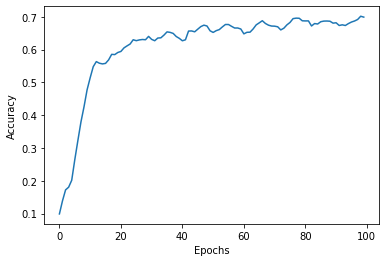

In [6]:
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [59]:
seed_text = "honeysuckle"
next_words = 10


output_index = [0,0,0]
output_word = [0,0,0]

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    
        # if-clauses I added, because otherwise the model sometimes gives the same word several times in a row:
    if predicted[0] == output_index[-1]:
        predicted = np.argsort(model.predict(token_list), axis=-1)[0][-2]
    
    # also this. Otherwise it sometimes gives a pair of two words several times in a row:
    if (predicted[0] == output_index[-2]) & (output_word[-1] == output_word[-3]):
        predicted = np.argsort(model.predict(token_list), axis=-1)[0][-2]
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word.append(word)
            output_index.append(index)
            break
    seed_text += " " + output_word[-1]
print(seed_text)

1/1 [==============================] - 0s 51ms/step
honeysuckle that browse the way and the eternal of the beach


In [ ]:

# check if last word is one of the non_words and if yes, chop it, than again test until we do not have a non_word
# maybe create your own list

# give an input word -> choose 10 or so words from the vocabulary we have here and choose the best fit. use this as seed_text.
# use a random number of 6-10 words or so as next_words

#use the next best fitting word and so on, don't know if it will  work fine

In [ ]:
#no_ending_word=['with', 'which', 'the', 'and', 'or', 'a', 'an', 'of', 'your', 'our', 'my']

In [26]:
input_word = input("Enter a noun: ")

Enter a word: bird


In [ ]:
#!pip install spacy --user

In [ ]:
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl

In [39]:
import spacy
spacy.cli.download("en_core_web_md")

import random

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [77]:
nlp = spacy.load('en_core_web_md')
topic = nlp(input_word)

#Create a list for the similarities:
sim_list = []
rand_word_list=[]

#choose 10 or so random words from word_index of data:
for i in range(0, 20):
    rand_word = random.choice(list(word_index.keys()))
    #print(rand_word)
    #find word in spacy
    rand_word_spacy = nlp(rand_word)
    rand_word_list.append(rand_word)

    #Compute similarity for the word:
    similarity = (topic.similarity(rand_word_spacy))
    sim_list.append(similarity)
    
#saves similarity to DataFrame
df_1 = pd.DataFrame({'similarity' : sim_list, 'word' : rand_word_list })
df_1.sort_values(by='similarity', inplace=True, ascending=False)


<ipython-input-77-81569f1b036f>:17: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = (topic.similarity(rand_word_spacy))


In [126]:
#df_1 = df_1.reset_index()
#art=random.choice(['a', 'the'])
#words_to_use=[df_1['word'][0],df_1['word'][1], df_1['word'][2], 'the ' + input_word]

words_to_use=['the ' + input_word]

for i in range(0,4):
    words_to_use.append(df_1['word'][i])


In [127]:
words_to_use

['the bird', 'sweetest', 'wing', 'spinning', 'lantern']

In [124]:
poem = []
choices = random.sample(words_to_use, 3)
for item in choices: 
    seed_text = item
    print('this is the seed: ', seed_text)
    next_words = random.choice([5,6,7,8,9])
    

    output_index = [0,0,0]
    output_word = [0,0,0]
    
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model_mo.predict(token_list), axis=-1)
        
            # if-clauses I added, because otherwise the model sometimes gives the same word several times in a row:
        if predicted[0] == output_index[-1]:
            predicted = np.argsort(model_mo.predict(token_list), axis=-1)[0][-2]
        
        # also this. Otherwise it sometimes gives a pair of two words several times in a row:
        #if (predicted[0] == output_index[-2]) & (output_word[-1] == output_word[-3]):
        #    predicted = np.argsort(model_mo.predict(token_list), axis=-1)[0][-2]
        
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word.append(word)
                output_index.append(index)
                break
        seed_text += " " + output_word[-1]
    
    poem.append(seed_text)
print(seed_text)

this is the seed:  sweetest
1/1 [==============================] - 0s 72ms/step
s
this is the seed:  wing
1/1 [==============================] - 0s 68ms/step
g
this is the seed:  the bird
1/1 [==============================] - 0s 69ms/step
t
the bird was saying anything i can t


In [125]:
poem

['sweetest one of those magical places',
 'wing like the dreams of your body waking',
 'the bird was saying anything i can t']